In [ ]:
!pip install quantdsl

In [1]:
%%writefile powerplant.py
from quantdsl.semantics import Choice, TimeDelta, Wait, inline


def PowerPlant(start, end, temp):
    if (start < end):
        Wait(start, Choice(
            PowerPlant(Tomorrow(start), end, Hot()) + ProfitFromRunning(start, temp),
            PowerPlant(Tomorrow(start), end, Stopped(temp))
        ))
    else:
        return 0


@inline
def Power(start):
    DayAhead(start, 'POWER')


@inline
def Gas(start):
    DayAhead(start, 'GAS')


@inline
def DayAhead(start, name):
    ForwardMarket(Tomorrow(start), name)

    
@inline
def Tomorrow(start):
    start + TimeDelta('1d')


@inline
def ProfitFromRunning(start, temp):
    if temp == Cold():
        return 0.3 * Power(start) - Gas(start)
    elif temp == Warm():
        return 0.6 * Power(start) - Gas(start)
    else:
        return Power(start) - Gas(start)


@inline
def Stopped(temp):
    if temp == Hot():
        Warm()
    else:
        Cold()


@inline
def Hot():
    2


@inline
def Warm():
    1


@inline
def Cold():
    0

Overwriting powerplant.py


In [2]:
gas_and_power = {
    'name': 'quantdsl.priceprocess.blackscholes.BlackScholesPriceProcess',
    'market': ['GAS', 'POWER'],
    'sigma': [0.1, 0.1],
    'rho': [[1.0, 0.8], [0.8, 1.0]],
    'curve': {
        'GAS': [
            ('2011-1-1', 1),
            ('2012-1-1', 13.5),
            ('2012-1-2', 19.4),
            ('2012-1-3', 10.5),
            ('2012-1-4', 10.3),
            ('2012-1-5', 10.1),
            ('2012-1-6', 10.2),
        ],
        'POWER': [
            ('2011-1-1', 11),
            ('2012-1-1', 15.5),
            ('2012-1-2', 14.0),
            ('2012-1-3', 15.0),
            ('2012-1-4', 11.0),
            ('2012-1-5', 1.0),
            ('2012-1-6', 15.0),
        ]
    }
}

In [4]:
from quantdsl import calc

results = calc(
    source_code=("from powerplant import PowerPlant, Cold, Date\n"
                 "PowerPlant(Date('2012-1-1'), Date('2012-1-12'), Cold())"),
    observation_date='2011-1-1',
    interest_rate=2.5,
    periodisation='daily',
    price_process=gas_and_power,
    verbose=True
)

Compiled 79 nodes 
Compilation in 0.847s
Simulation in 0.174s
Starting 1267 node evaluations, please wait...
1267/1267 100.00% complete 84.68 eval/s running 15s eta 0s     
Evaluation in 14.962s


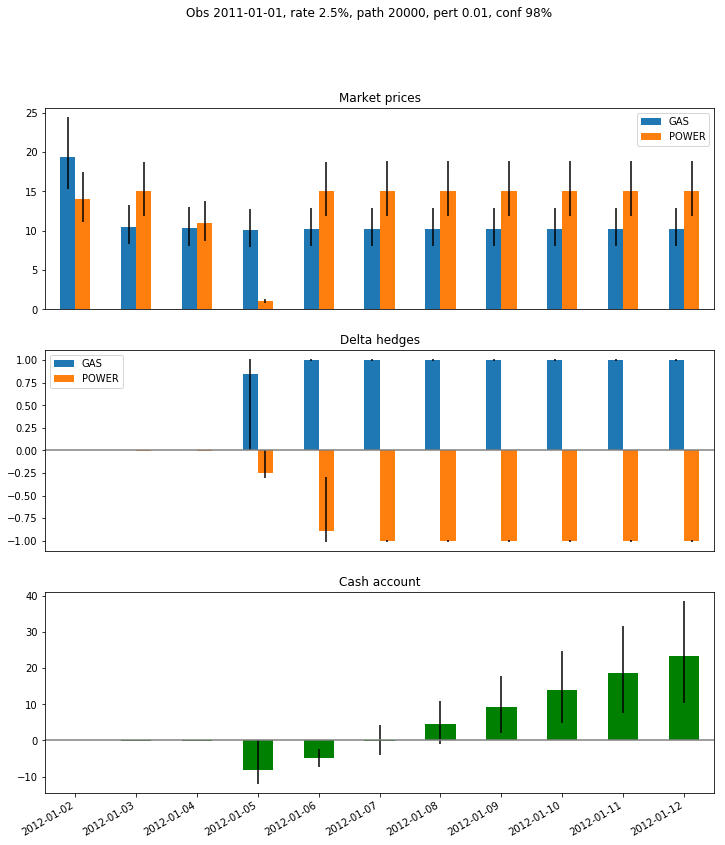

In [5]:
results.plot(
    confidence_interval=98,
    figsize=(12, 14)
)

In [6]:
print(results)



2012-01-02 GAS
Price:    19.41
Delta:     0.00
Hedge:     0.00 ± 0.00
Cash:     -0.00 ± 0.00

2012-01-02 POWER
Price:    14.01
Delta:     0.00
Hedge:     0.00 ± 0.00
Cash:     -0.00 ± 0.00

2012-01-03 GAS
Price:    10.50
Delta:    -0.01
Hedge:     0.01 ± 0.00
Cash:     -0.09 ± 0.03

2012-01-03 POWER
Price:    15.01
Delta:     0.00
Hedge:    -0.00 ± 0.00
Cash:      0.04 ± 0.02

2012-01-04 GAS
Price:    10.30
Delta:    -0.01
Hedge:     0.01 ± 0.00
Cash:     -0.09 ± 0.03

2012-01-04 POWER
Price:    11.01
Delta:     0.01
Hedge:    -0.01 ± 0.00
Cash:      0.11 ± 0.03

2012-01-05 GAS
Price:    10.10
Delta:    -0.83
Hedge:     0.85 ± 0.00
Cash:     -8.29 ± 0.08

2012-01-05 POWER
Price:     1.00
Delta:     0.25
Hedge:    -0.25 ± 0.00
Cash:      0.25 ± 0.01

2012-01-06 GAS
Price:    10.20
Delta:    -0.98
Hedge:     1.00 ± 0.00
Cash:     -9.95 ± 0.02

2012-01-06 POWER
Price:    15.01
Delta:     0.87
Hedge:    -0.90 ± 0.00
Cash:     13.18 ± 0.08

2012-01-07 GAS
Price:    10.20
Delta:    -0.97
H